<a href="https://colab.research.google.com/github/wsandy1/2d-physics-engine/blob/main/SESA2022%20Tutorial%20Sheet%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

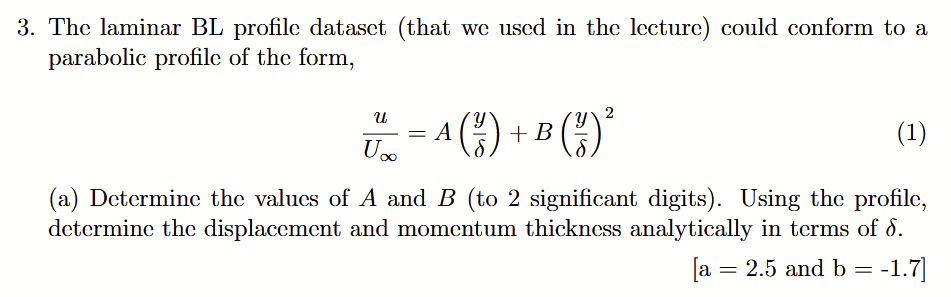

[ 2.50979108 -1.67490469]


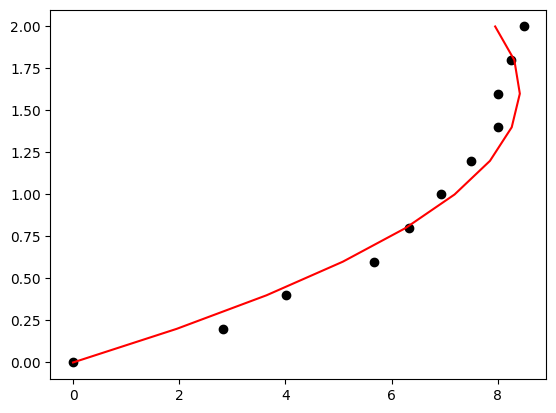

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv('/content/laminar_profile.csv')
a,b = df.columns

y = df[a] # these are in mm
u = df[b]

# find freestream velocity and d99 thickness
U_infty = u.max()
delta = np.interp(0.99*U_infty, u, y)

# objective function for curve fit
def profile(y_in, A, B):
  return U_infty*(A*(y_in/delta)+B*(y_in/delta)**2)

# find index to insert edge point
idx = np.where(y > delta)[0][0]

# y_new = np.insert(y, idx, delta)[0:idx+1]
# u_new = np.insert(u, idx, U_infty*0.99)[0:idx+1]
y_new = y[0:idx]
u_new = u[0:idx]



popt, pcov = curve_fit(profile, y_new, u_new)
print(popt)

plt.plot(u_new, y_new, "ko")
plt.plot(profile(y_new, popt[0], popt[1]), y_new, "r-")
plt.show()
